# Code to shuffle anomalies and conduct EDM analysis


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data.

Data 

In [186]:
df = pd.read_csv('low_high_ts_df.csv')
columns = list(df.columns)

In [108]:
def norm(df):
    """ 
        Return normalized values with a mean of zero and a standard deviation of 1
    
        - Uses numpy to speed up these calculations.
        
    """
    return (df.values - df.values.mean(axis=0))/df.values.std(axis=0)


def anomaly(df):
    """
        Return anomalies for each value.
        
        - Uses numpy to speed up these calculations.
        
    """
    return (df.values - df.values.mean(axis=0))


In [187]:
df = pd.DataFrame(norm(df), columns=columns)
ndvi = df['NDVI_high_skill']
df['dekad'] = np.mod(df.index.values,36)

In [151]:
dekads = df.groupby('dekad')
dekad_mean = dekads.transform(np.mean)
dekad_mean['dekad'] = np.mod(df.index.values,36)

In [152]:
dekad_anom = df - dekad_mean

,0,1,2,3,4,5,6,dekad
0,-0.082887,-0.471129,-0.533999,0.274605,-0.419220,0.992651,-0.952593,0
1,-0.077171,-0.709119,-0.501305,0.398166,-0.150965,1.332620,-1.252673,1
2,-0.071454,-0.808104,-0.252512,0.285988,0.173592,2.275370,-1.095029,2
3,-0.065738,-0.793876,0.111229,0.301023,0.560113,1.888203,-1.666668,3
4,-0.060022,-0.747616,-0.012160,0.393163,1.041817,2.193606,-1.478218,4
...,...,...,...,...,...,...,...,...
601,0.060022,0.270383,0.161931,0.134927,-0.929238,-0.467817,1.238599,25
602,0.065738,0.237185,0.371609,-0.140393,-0.948912,-0.478676,1.507397,26
603,0.071454,0.263417,2.088564,0.105979,-0.961132,-0.339460,1.354604,27
604,0.077171,0.359090,2.019406,0.121556,-0.962451,-0.367188,1.408224,28


In [179]:
df_surrogate = (dekad_mean + np.random.permutation(dekad_anom))
df_surrogate.columns = columns[:] + ['dekad']
df_surrogate['NDVI_high_skill'] = ndvi
df.columns = columns[:] + ['dekad']

<AxesSubplot:>

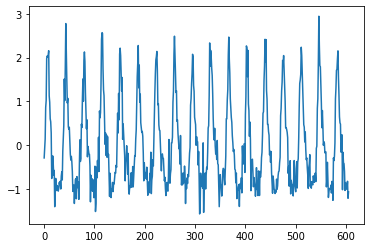

In [177]:
df_surrogate['NDVI_high_skill'].plot()

<AxesSubplot:>

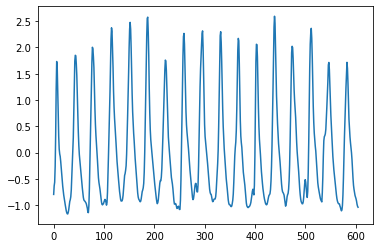

In [181]:
df['NDVI_high_skill'].plot()

Text(0, 0.5, 'Surrogate')

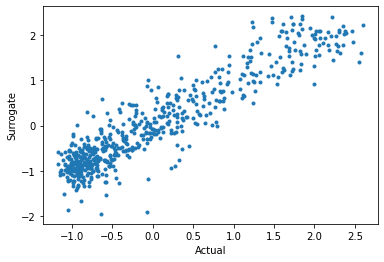

In [180]:
plt.plot(df['NDVI_high_skill'], df_surrogate['NDVI_high_skill'], '.')
plt.xlabel('Actual')
plt.ylabel('Surrogate')